<a href="https://colab.research.google.com/github/NiKo-sid/Data_Vis/blob/main/Vis_Q5_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

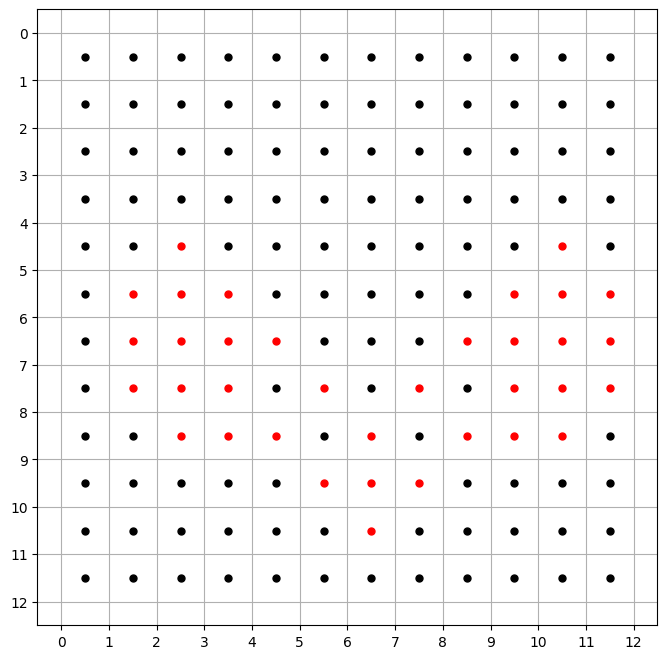

In [1]:
import numpy as np
import matplotlib.pyplot as plt

scalars = np.load("scalars_2D.npy")
rows, cols = scalars.shape


isovalue = 50

def draw_dot(ax, x, y, color):
    """Helper function to draw a dot at (x, y) with the specified color."""
    ax.plot(x, y, marker='o', color=color, markersize=5)


fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks(range(cols))
ax.set_yticks(range(rows))
ax.grid(True)


for i in range(rows - 1):
    for j in range(cols - 1):

        center_x = j + 0.5
        center_y = i + 0.5


        color = 'red' if scalars[i, j] > isovalue else 'black'


        draw_dot(ax, center_x, center_y, color)

plt.gca().invert_yaxis()
plt.show()


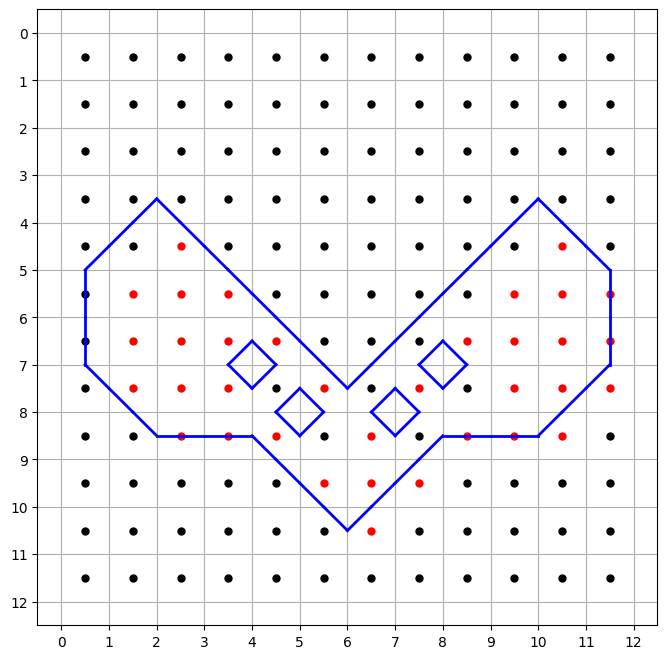

In [2]:
import numpy as np
import matplotlib.pyplot as plt


scalars = np.load("scalars_2D.npy")
rows, cols = scalars.shape

isovalue = 50

def draw_dot(ax, x, y, color):
    """Helper function to draw a dot at (x, y) with the specified color."""
    ax.plot(x, y, marker='o', color=color, markersize=5)

def draw_line(ax, x1, y1, x2, y2):
    """Helper function to draw a line between two points."""
    ax.plot([x1, x2], [y1, y2], color='blue', linewidth=2)


fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks(range(cols))
ax.set_yticks(range(rows))
ax.grid(True)


for i in range(rows - 1):
    for j in range(cols - 1):

        center_x = j + 0.5
        center_y = i + 0.5


        color = 'red' if scalars[i, j] > isovalue else 'black'


        draw_dot(ax, center_x, center_y, color)


for i in range(rows - 1):
    for j in range(cols - 1):

        top_left = scalars[i, j] > isovalue
        top_right = scalars[i, j+1] > isovalue
        bottom_left = scalars[i+1, j] > isovalue
        bottom_right = scalars[i+1, j+1] > isovalue


        case_index = (top_left << 3) | (top_right << 2) | (bottom_right << 1) | bottom_left


        mid_top = (j + 0.5, i)
        mid_bottom = (j + 0.5, i + 1)
        mid_left = (j, i + 0.5)
        mid_right = (j + 1, i + 0.5)


        case_lines = {
            1: [mid_left, mid_bottom],
            2: [mid_bottom, mid_right],
            3: [mid_left, mid_right],
            4: [mid_top, mid_right],
            5: [mid_top, mid_left, mid_bottom, mid_right],
            6: [mid_top, mid_bottom],
            7: [mid_top, mid_left],
            8: [mid_top, mid_left],
            9: [mid_top, mid_bottom],
            10: [mid_top, mid_right, mid_left, mid_bottom],
            11: [mid_top, mid_right],
            12: [mid_left, mid_right],
            13: [mid_bottom, mid_right],
            14: [mid_left, mid_bottom],
        }


        if case_index in case_lines:
            points = case_lines[case_index]
            for k in range(0, len(points), 2):
                draw_line(ax, *points[k], *points[k+1])

plt.gca().invert_yaxis()
plt.show()


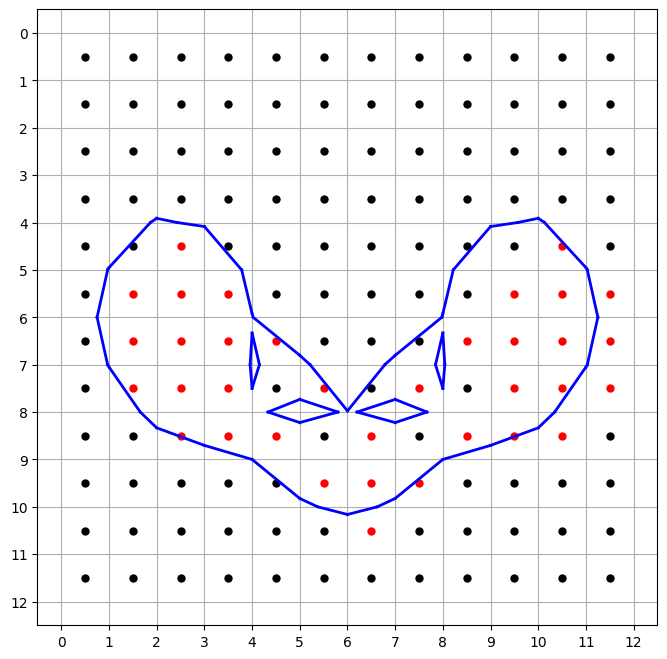

In [3]:
import numpy as np
import matplotlib.pyplot as plt


scalars = np.load("scalars_2D.npy")
rows, cols = scalars.shape


isovalue = 50

def draw_dot(ax, x, y, color):
    """Helper function to draw a dot at (x, y) with the specified color."""
    ax.plot(x, y, marker='o', color=color, markersize=5)

def draw_line(ax, x1, y1, x2, y2):
    """Helper function to draw a line between two points."""
    ax.plot([x1, x2], [y1, y2], color='blue', linewidth=2)

def interpolate(p1, p2, v1, v2, iso):
    """Performs linear interpolation to determine contour line position."""
    if abs(iso - v1) < 1e-6:
        return p1
    if abs(iso - v2) < 1e-6:
        return p2
    if abs(v1 - v2) < 1e-6:
        return p1
    return p1 + (p2 - p1) * (iso - v1) / (v2 - v1)


fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks(range(cols))
ax.set_yticks(range(rows))
ax.grid(True)


for i in range(rows - 1):
    for j in range(cols - 1):

        center_x = j + 0.5
        center_y = i + 0.5


        color = 'red' if scalars[i, j] > isovalue else 'black'

        draw_dot(ax, center_x, center_y, color)


for i in range(rows - 1):
    for j in range(cols - 1):

        v1, v2 = scalars[i, j], scalars[i, j+1]
        v3, v4 = scalars[i+1, j], scalars[i+1, j+1]


        case_index = ((v1 > isovalue) << 3) | ((v2 > isovalue) << 2) | ((v4 > isovalue) << 1) | (v3 > isovalue)

        mid_top = (interpolate(j, j+1, v1, v2, isovalue), i)
        mid_bottom = (interpolate(j, j+1, v3, v4, isovalue), i+1)
        mid_left = (j, interpolate(i, i+1, v1, v3, isovalue))
        mid_right = (j+1, interpolate(i, i+1, v2, v4, isovalue))


        case_lines = {
            1: [mid_left, mid_bottom],
            2: [mid_bottom, mid_right],
            3: [mid_left, mid_right],
            4: [mid_top, mid_right],
            5: [mid_top, mid_left, mid_bottom, mid_right],
            6: [mid_top, mid_bottom],
            7: [mid_top, mid_left],
            8: [mid_top, mid_left],
            9: [mid_top, mid_bottom],
            10: [mid_top, mid_right, mid_left, mid_bottom],
            11: [mid_top, mid_right],
            12: [mid_left, mid_right],
            13: [mid_bottom, mid_right],
            14: [mid_left, mid_bottom],
        }


        if case_index in case_lines:
            points = case_lines[case_index]
            for k in range(0, len(points), 2):
                draw_line(ax, *points[k], *points[k+1])

plt.gca().invert_yaxis()
plt.show()
